# Data Science Task for Koodoo job application process.
# Analysis of an Air B&B data set.
# David Brookes January 2021

In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Print current working directory (folder).
curr_dir=os.getcwd()
print(curr_dir)

# Change working directory.
# Note: 'r' allows backslashes (and forward slashes) in the file path name.

os.chdir("D:\My Documents\Python Code\Koodoo Tasks\Solutions\Data Science Project")

curr_dir=os.getcwd()
print(curr_dir)

C:\Users\David Brookes\Notebooks\Post-MSc-Projects\Python Koodoo Tasks
D:\My Documents\Python Code\Koodoo Tasks\Solutions\Data Science Project


In [3]:
# Read the comma separated value file into a Pandas DataFrame.
airbnb = pd.read_csv('airbnb_dataset.csv')
#print(airbnb.head())
#print(type(airbnb))

In [4]:
# Count the number of rows and columns in the dataframe.

num_rows = airbnb.shape[0]
num_rows = airbnb.shape[1]

print('Number of rows: ', airbnb.shape[0])
print('Number of columns: ', airbnb.shape[1])

Number of rows:  158284
Number of columns:  16


In [5]:
# Drop the 'property_id' column as the values are arbitrary.

airbnb2 = airbnb.drop('property_id', axis = 1, inplace= False)
#print(airbnb2.head())

In [6]:
# Calculate the correlation matrix.
corrMatrix = airbnb2.corr()
print(corrMatrix)

                                accommodates      beds  bedrooms     price  \
accommodates                        1.000000  0.812358  0.812372  0.289674   
beds                                0.812358  1.000000  0.999971  0.336037   
bedrooms                            0.812372  0.999971  1.000000  0.336042   
price                               0.289674  0.336037  0.336042  1.000000   
minimum_nights                     -0.000828 -0.001603 -0.001603 -0.000687   
number_of_reviews                   0.091903  0.049523  0.049513  0.052470   
reviews_per_month                   0.045563 -0.012537 -0.012523 -0.072695   
calculated_host_listings_count      0.057699  0.019423  0.019411  0.043989   
availability_365                    0.113756  0.088135  0.088146  0.034748   

                                minimum_nights  number_of_reviews  \
accommodates                         -0.000828           0.091903   
beds                                 -0.001603           0.049523   
bedrooms    

path:  D:\My Documents\Python Code\Koodoo Tasks\Solutions\Data Science Project\correlation_matrix\correlation_matrix.png


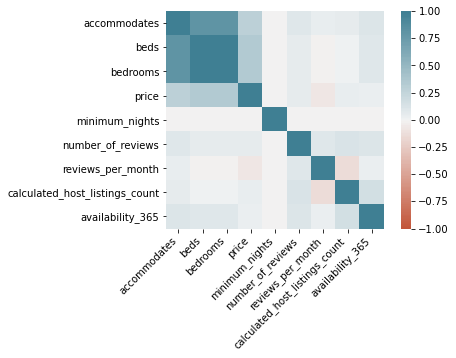

In [7]:
# Plot the heat map for the correlation matrix.

ax = sns.heatmap(
    corrMatrix, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

# Save plot to file.

path = os.path.join(curr_dir, "correlation_matrix", "correlation_matrix" + "." + "png")
print('path: ',path)
plt.savefig(path, format="png", dpi=300)

# Show the plot.
plt.show()


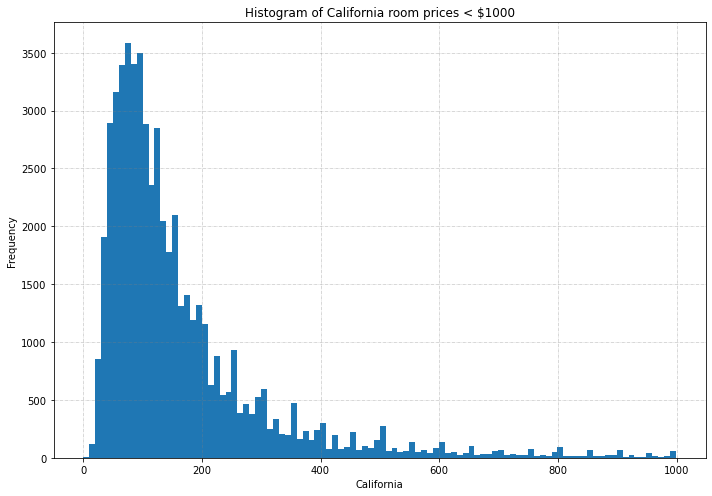

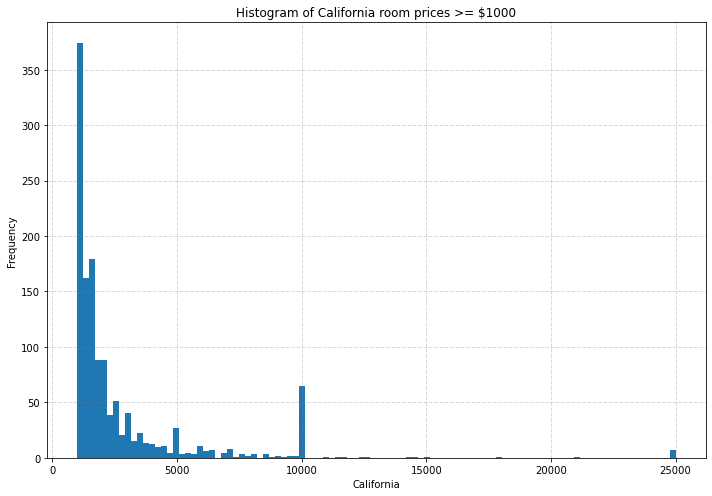

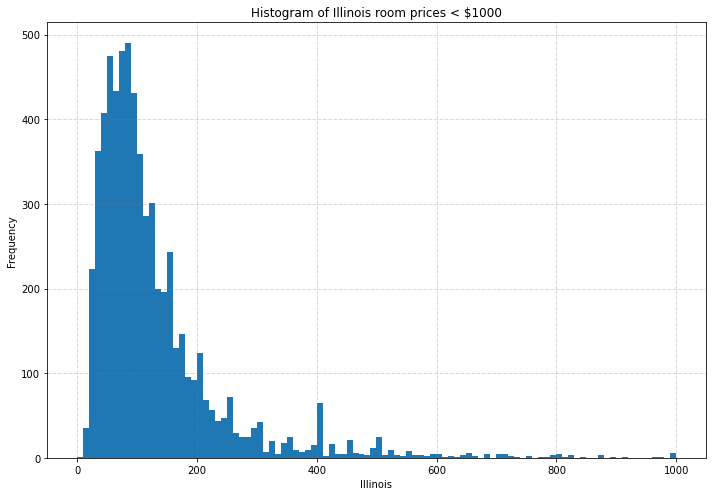

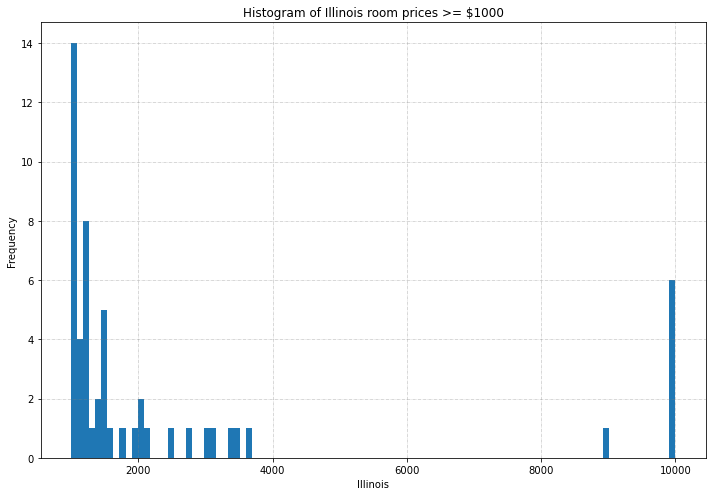

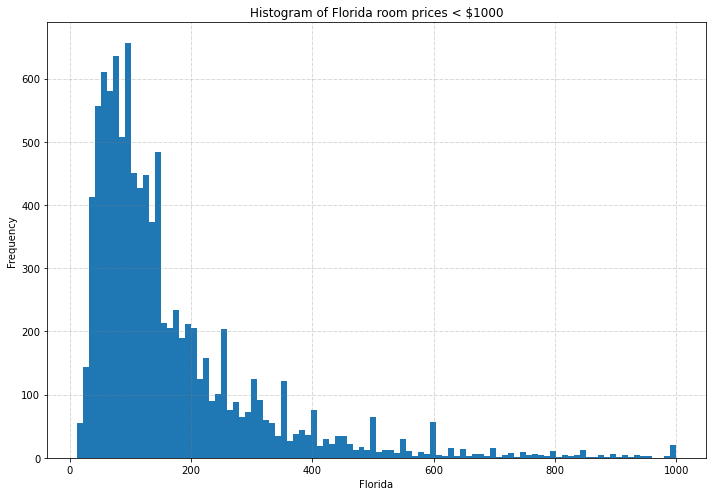

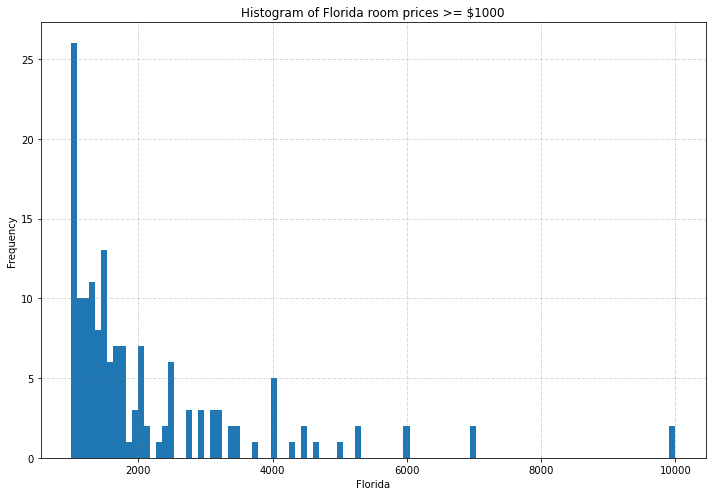

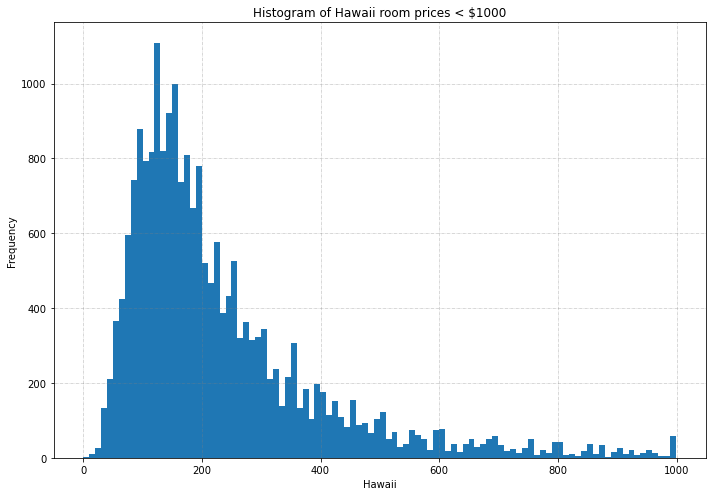

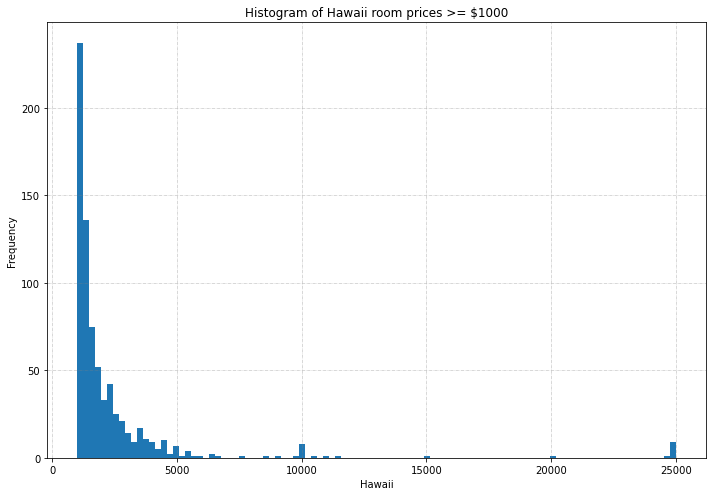

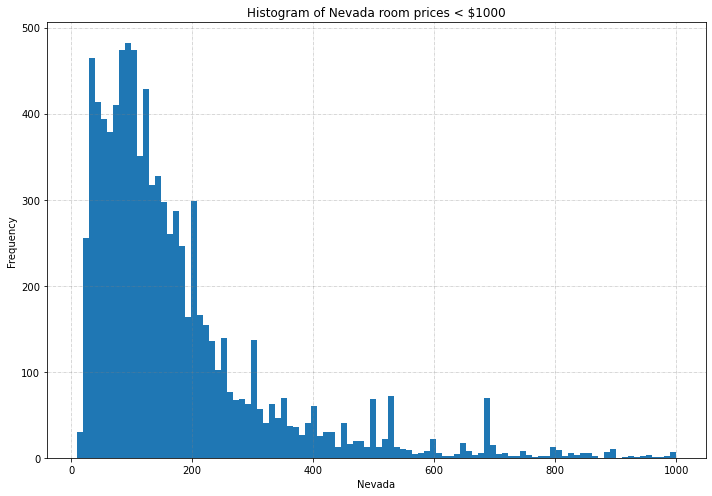

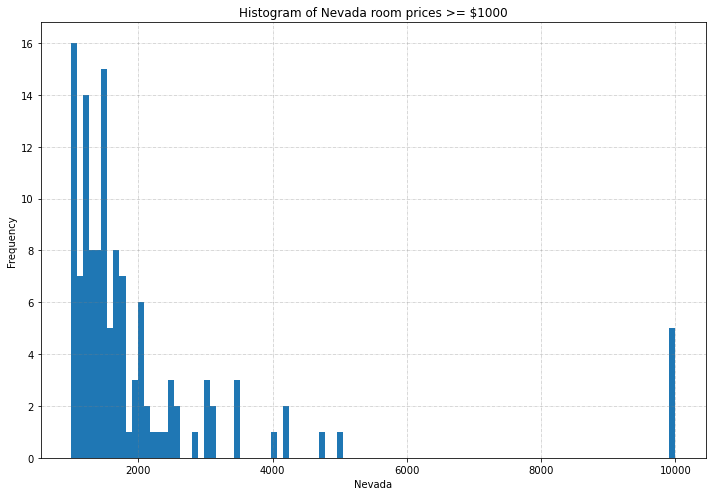

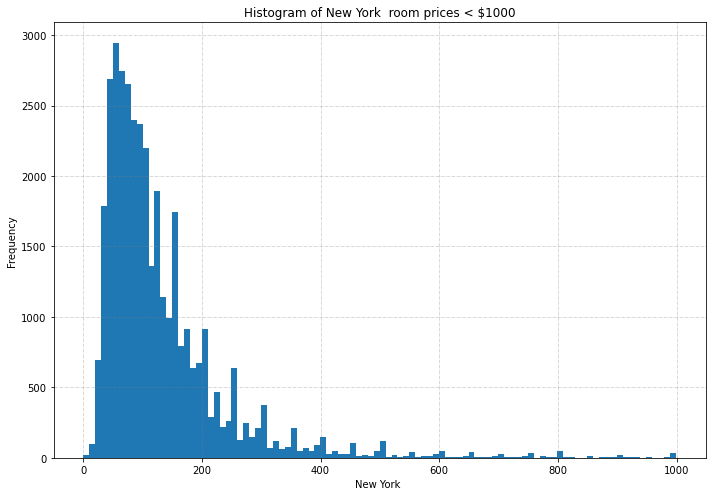

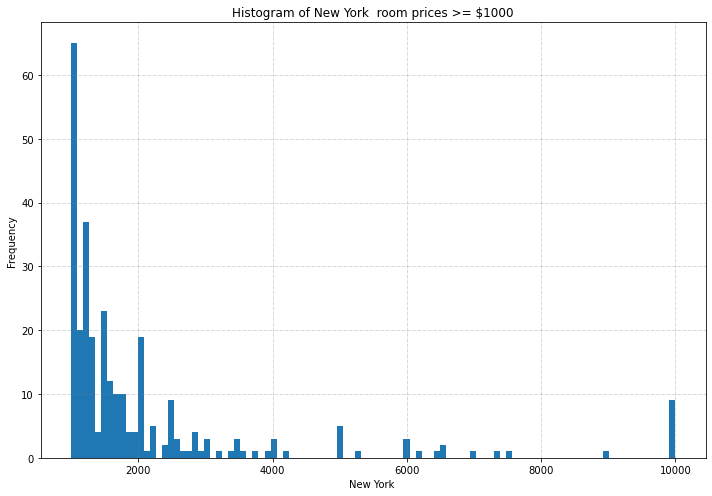

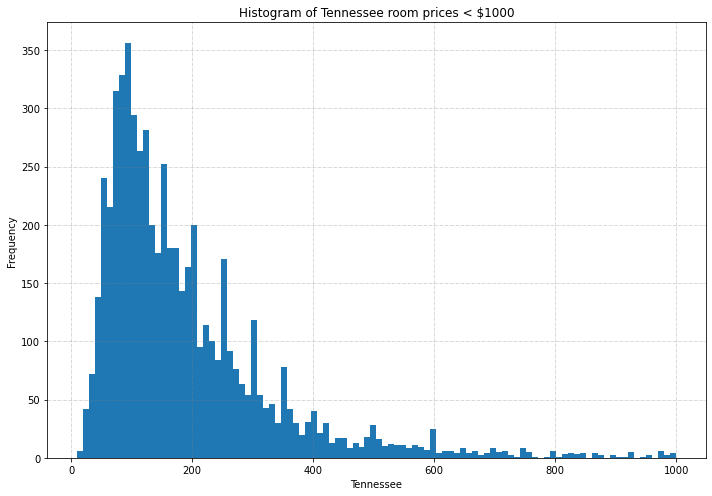

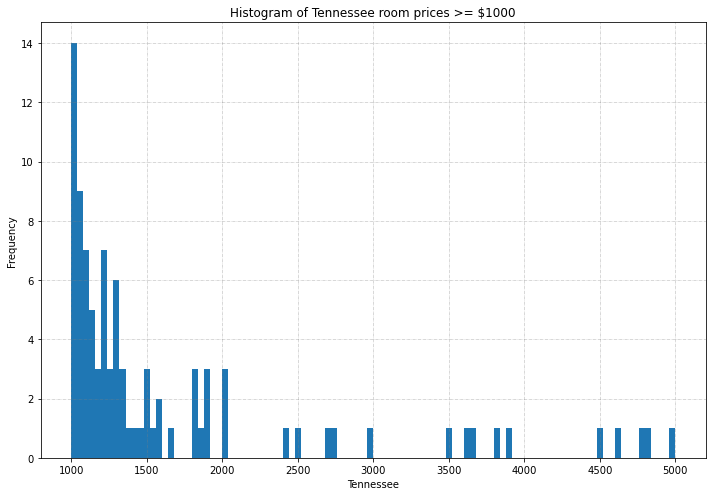

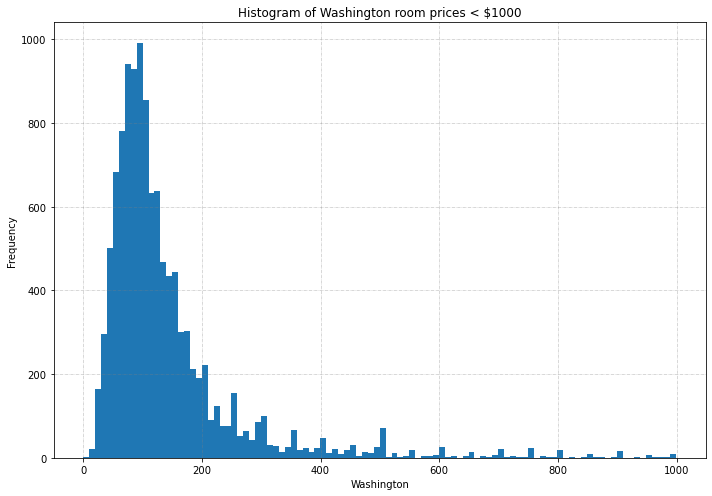

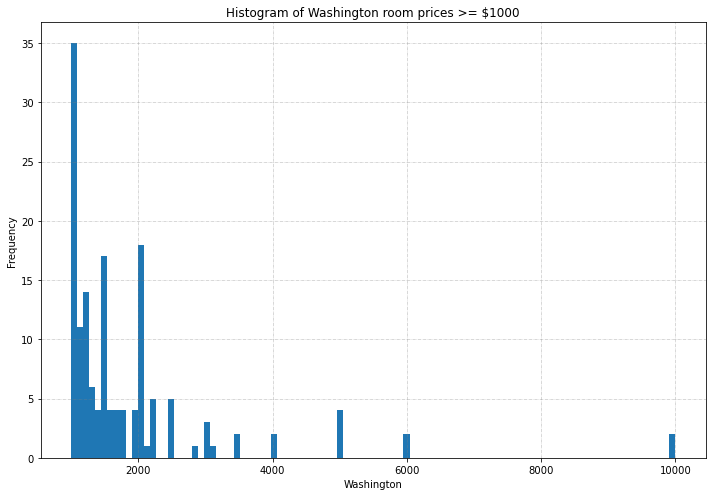

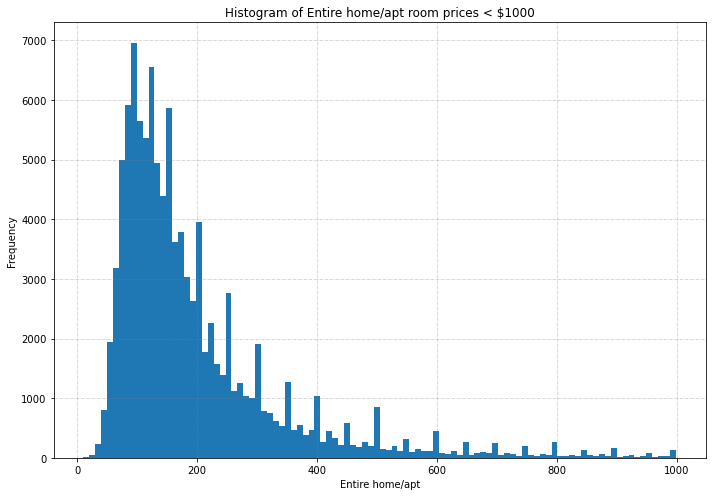

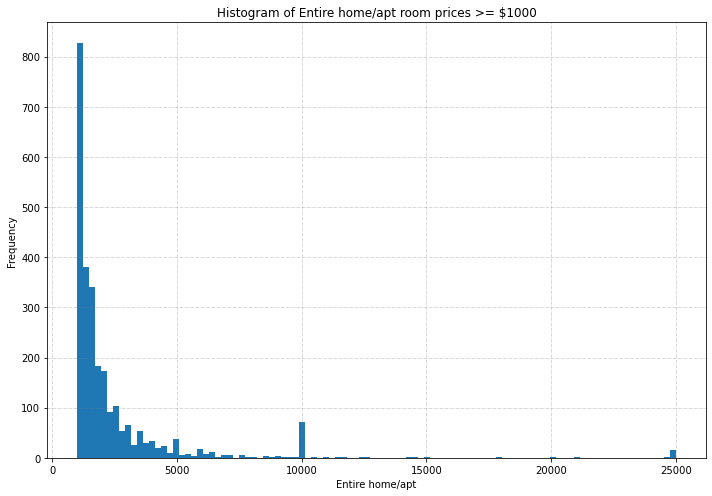

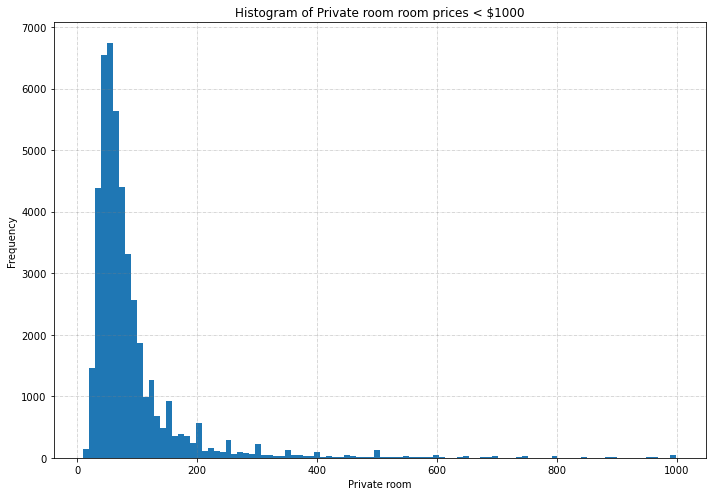

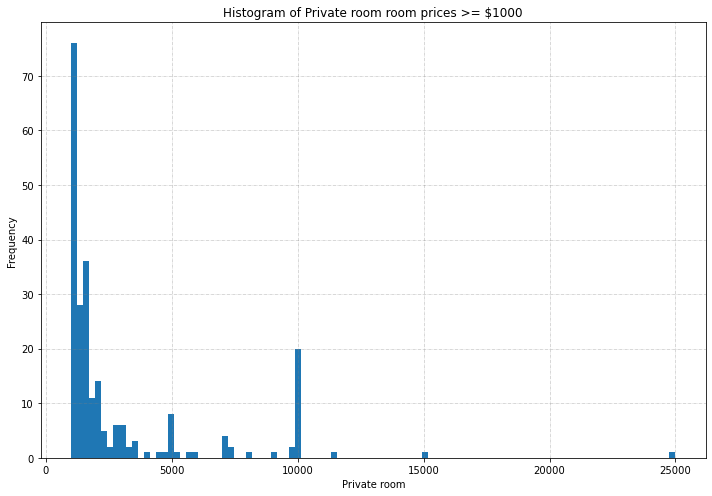

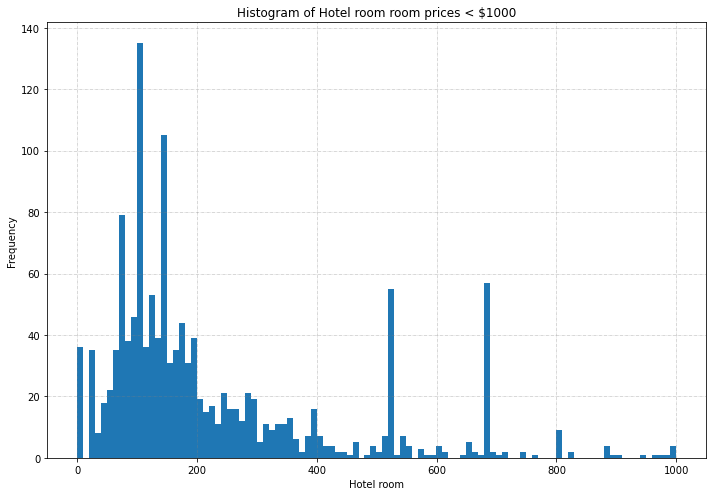

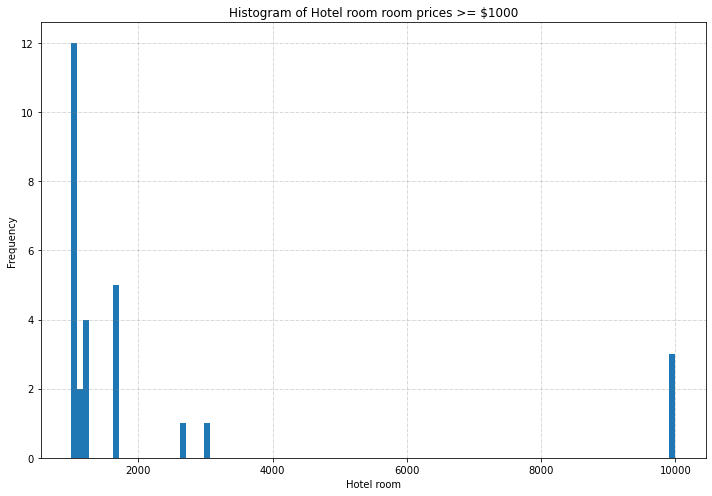

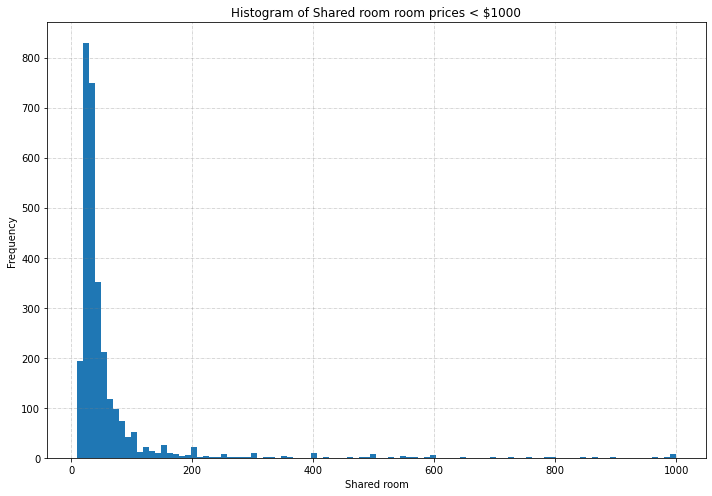

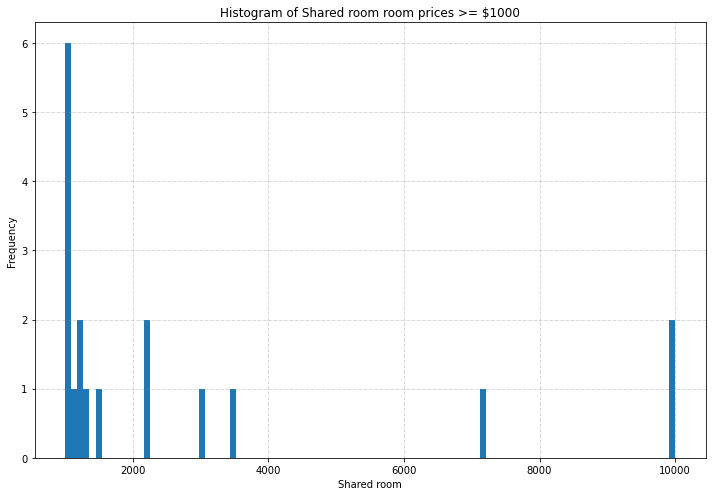

In [8]:
# Histogram plots.

features =['State', 'room_type']

for f in features:
    f_names = airbnb2[f].unique()
    
    images_path = os.path.join(curr_dir, f)   
    
    for f_name in f_names:
        for price_range in [' room prices < $1000', ' room prices >= $1000' ]:
        
            if price_range == ' room prices < $1000':
                feature_prices = airbnb2[(airbnb2[f] == f_name) & (airbnb2['price'] < 1000)]['price']
                filename_extension = "_under_1000"
            else:
                feature_prices = airbnb2[(airbnb2[f] == f_name) & (airbnb2['price'] >= 1000)]['price']
                filename_extension = "_over_1000"

            n_bins = 100
            # Creating histogram.
            fig, axs = plt.subplots(1, 1, 
                            figsize =(10, 7),  
                            tight_layout = True) 

            # Add x, y gridlines.  
            axs.grid(b = True, color ='grey',  
            linestyle ='-.', linewidth = 0.5,  
            alpha = 0.6)  

            # Creating histogram. 
            N, bins, patches = axs.hist(feature_prices, bins = n_bins) 

            plt.xlabel(f_name)
            plt.ylabel('Frequency')
            plt.title('Histogram of '+ f_name + price_range)  

            if f_name == 'Entire home/apt': # Don't want filenames with forward slashes in them.
                f_name_path_friendly = 'Entire home or apt'
            else:
                f_name_path_friendly = f_name

            path = os.path.join(images_path, f_name_path_friendly + filename_extension + "." + "png")
            #print('path: ',path)
            plt.savefig(path, format="png", dpi=300)

            # Show plot.
            plt.show()
      